In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
df=pd.read_csv("loan_status.csv")
# Drop rows with missing values for simplicity
df=df.dropna()

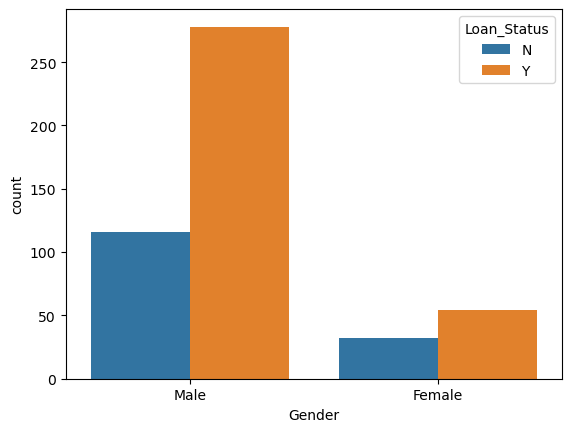

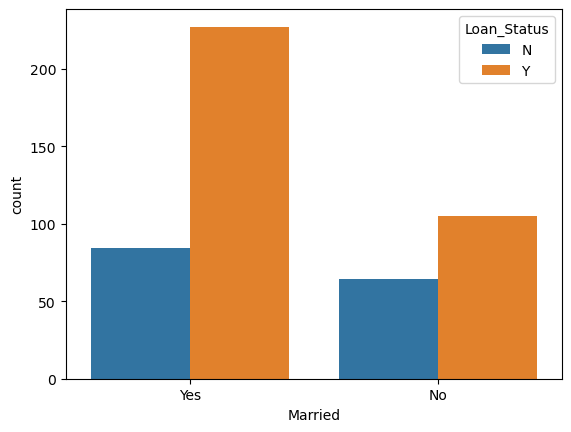

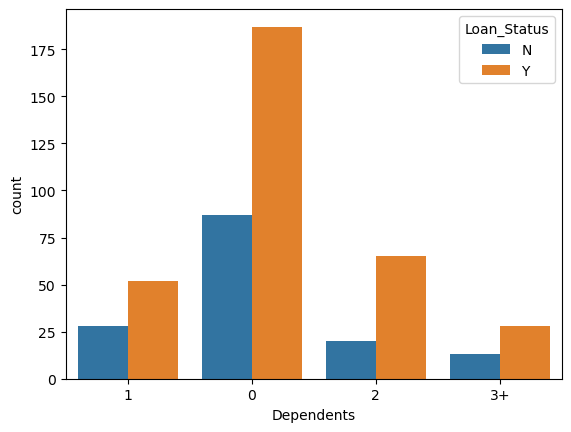

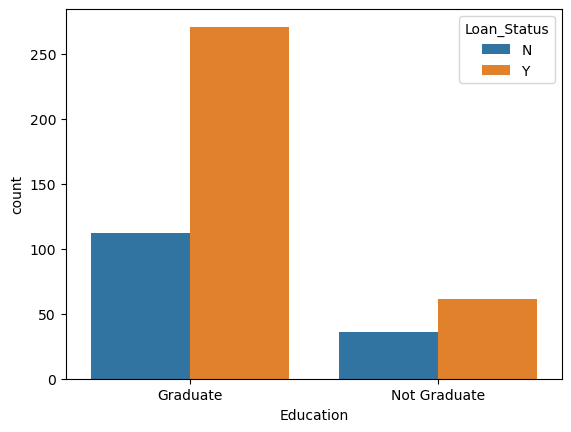

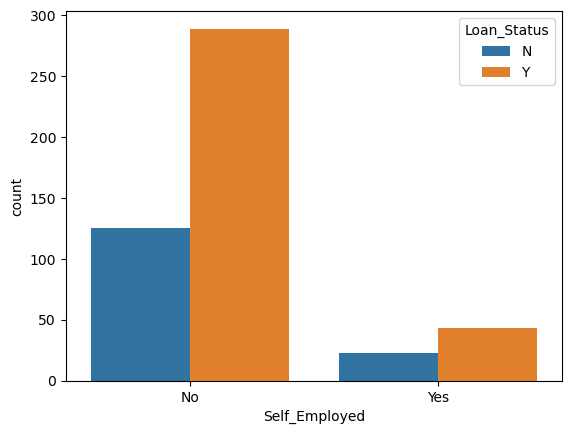

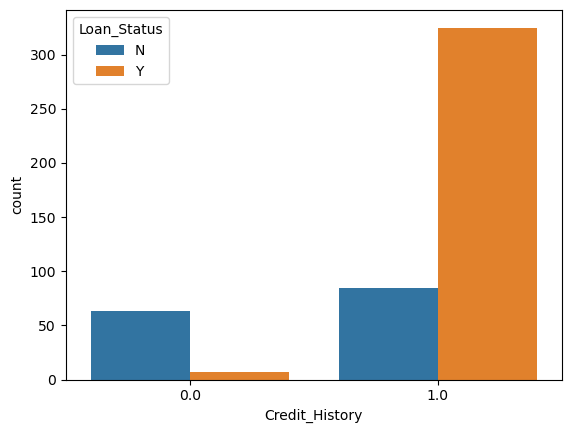

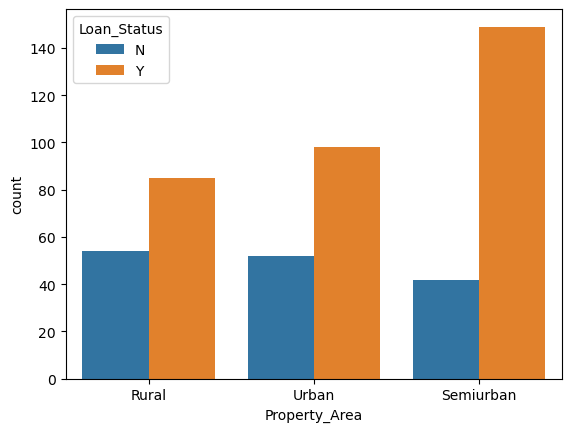

C:\Users\Karthik\AppData\Local\Temp\ipykernel_20704\2924051621.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [ ]:
# Visualize distributions of categorical features grouped by loan status
col= df.columns.drop(['Loan_ID','Loan_Status','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])
for i in col:
    sns.countplot(x=i,hue='Loan_Status',data=df)
    plt.show()

# Encode categorical variables to numeric values
df.replace({
    "Loan_Status": {"Y": 1, "N": 0},
    "Dependents": {"3+": 4},
    "Education": {"Graduate": 0, "Not Graduate": 1},
    "Gender": {"Male": 1, "Female": 0},
    "Married": {"Yes": 1, "No": 0},
    "Self_Employed": {"Yes": 1, "No": 0},
    'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}
}, inplace=True)

In [ ]:
# Separate features and target variable
x=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

# Split into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Create and train an SVM classifier
classifier=svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)

# Predict on the test set and evaluate accuracy
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy of the Model on Loan Status Dataset:",acc)

Accuracy of the Model on Heart Disease Dataset: 0.7916666666666666


In [ ]:
# Example input data for a loan applicant 
inp=(1, 1, 0, 0, 0, 5000, 0, 128, 360, 1, 1)

# Convert input to numpy array and reshape for prediction
inp= np.asarray(inp).reshape(1, -1)

# Predict using the trained classifier
pred = classifier.predict(inp)

# Print result
if pred[0] == 1:
    print("Loan will be approved.")
else:
    print("Loan will be denied.")

Loan will be approved.


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
